In [ ]:
import sys
import matplotlib.pyplot as plt
import numpy as np
sys.path.append('..')
from CB2325NumericaG3.interpolacao import linear_interp, poly_interp, hermite_interp

In [ ]:
# Criando Interpolação
X = [1, 2, 3, 4, 5, 6]
Y = [3, 6, 5, 1, 0, -4]
f = linear_interp(X, Y)

# Criando Interpolação 2
X = [5, 3, 7, 6, 10, -1, 0]
Y = [3, 4, 2, 8, 5, 1, 5]
f2 = linear_interp(X, Y)

print(f(3.5))
print(f2(4))

3.0
3.5


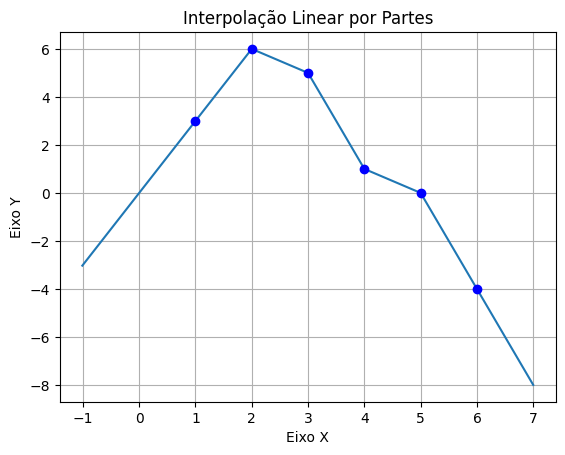

In [ ]:
# Plotando gráfico de f
f("graf", -1, 7, 100, "Interpolação Linear por Partes")

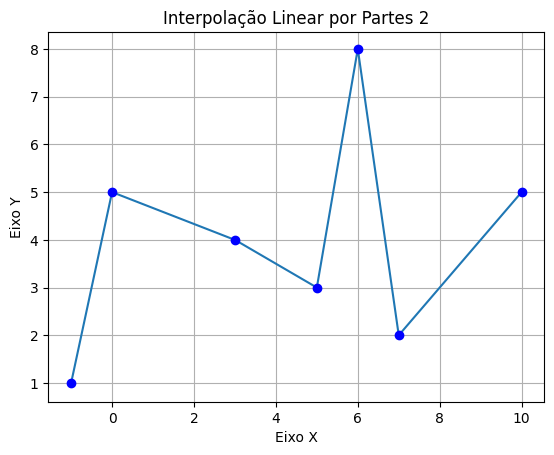

In [ ]:
# Plotando gráfico de f2
f2("graf", -1, 10, 100, "Interpolação Linear por Partes 2")

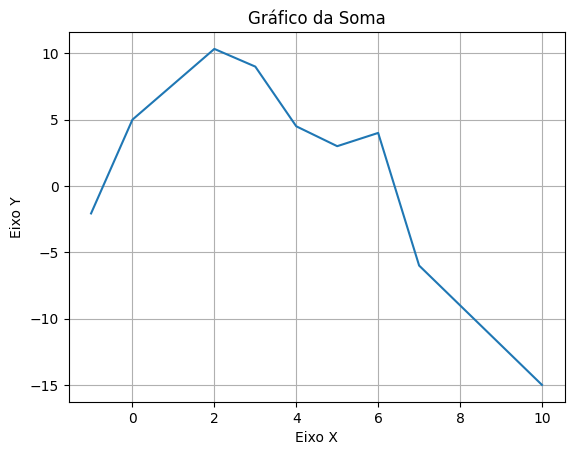

In [ ]:
# Operando com f e f2
def S(t):
  return f(t)+f2(t)

x = [x / 100 for x in range(100*-1//1 -1, 100*10//1 + 1)]
y = [S(t) for t in x]

plt.plot(x, y)

plt.title("Gráfico da Soma")
plt.xlabel("Eixo X")
plt.ylabel("Eixo Y")
plt.grid(True)

plt.show()

O seno de 30° vale(aprox): 0.4970912322408898


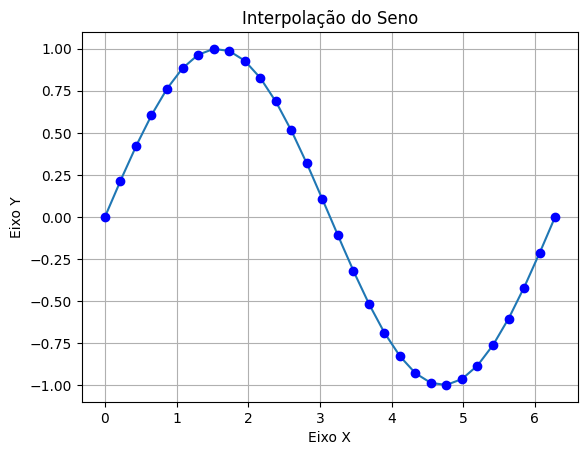

In [ ]:
# Interpolação da função seno
import numpy as np

X = np.linspace(0, 2*np.pi, 30)
Y = np.sin(X)

sen = linear_interp(X,Y)

print("O seno de 30° vale(aprox):", sen(np.pi/6))

sen("graf", 0, 2*np.pi, 100, "Interpolação do Seno")

In [23]:
# Criando a Interpolação
X = [0, 1, 2, 3, 4]
Y = [[0], [1], [4], [9], [16]]  # f(x)
f = hermite_interp(X, Y, plot=False)

print(f(2.5))
print(f(5))

6.25
25.0


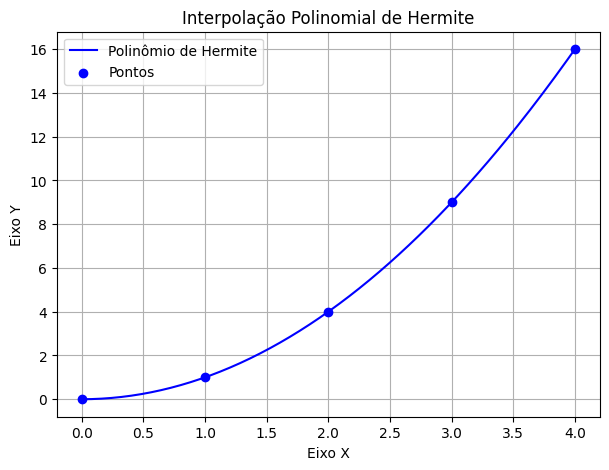

In [24]:
# Plotando o gráfico de f
h_func = hermite_interp(X, Y, title="Interpolação Polinomial de Hermite")

In [21]:
# Criando Interpolação com derivadas
X = [-2, -1, 0, 1, 2]
# f(x), f'(x)
derivadas = [[7, -5], [3, -3], [1, -1], [1, 1], [3, 3]]
f2 = hermite_interp(X, derivadas, plot=False)

print(f2(3))
print(f2(-3))

7.0
13.0


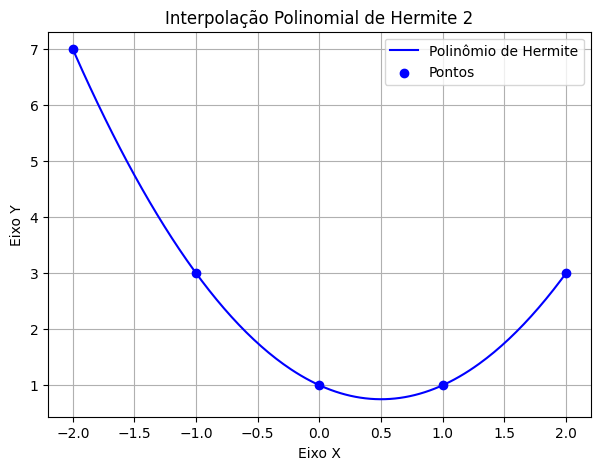

In [22]:
# Plotando gráfico de f2
h_func2 = hermite_interp(X, derivadas, title="Interpolação Polinomial de Hermite 2")

In [41]:
# Interpolação com número de derivadas por ponto variável
X = [-1, 0, 2, 5]
# f(x), f'(x), f''(x),...
derivadas = [[0, 1 ,1], [1], [1, 3], [-1, 2, 1, 3]]
f3 = hermite_interp(X, derivadas, plot=False)

print(f3(1))

-0.531197317482091


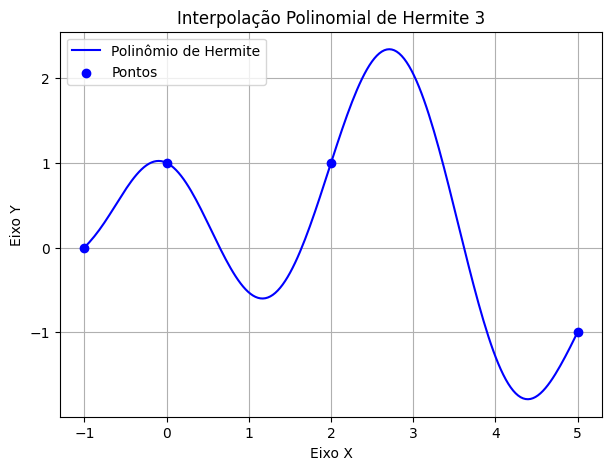

In [42]:
# Plotando gráfico de f3
h_func3 = hermite_interp(X, derivadas, title="Interpolação Polinomial de Hermite 3")

In [66]:
# Interpolação de cos²(x)
X = np.linspace(0, 2*np.pi, 5)
D = [[np.cos(x)**2, -np.sin(2*x), -2*np.cos(2*x)] for x in X]

cos = hermite_interp(X, D, plot=False)

print("cos²(π/4):", cos(np.pi/4))

cos²(π/4): 0.500064915309246


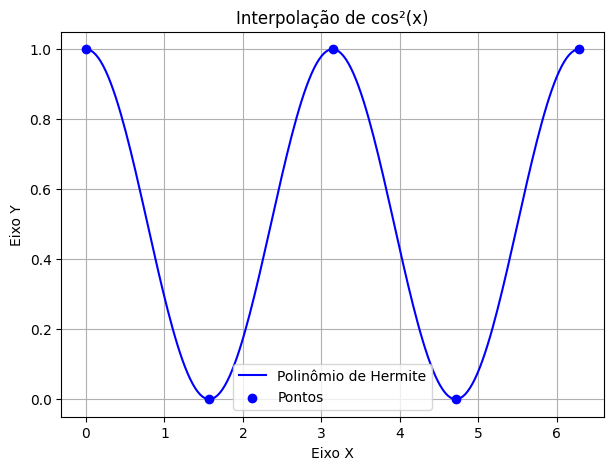

In [67]:
cos2 = hermite_interp(X, D, title="Interpolação de cos²(x)")